#      Sentiment Anlysis Using AI With DistilBERT

importing required librabries :-
1) tranformers :- It is python librabries by hugging face to handle models like DistilBERT
2) torch :- It is an open source machine learning framework based on the python programming language and the torch library. It is used for running models.
3) concurrent.futures :- It is module provides a high-level interface for asynchronously executing using threads or processes.

In [1]:
import pandas as pd
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, DistilBertModel
from transformers import pipeline
import torch
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from concurrent.futures import ThreadPoolExecutor, as_completed

understanding the data

In [2]:
df = pd.read_csv("threads_reviews.csv", encoding='latin-1')
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


In [3]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [4]:
df.shape

(32910, 4)

In [5]:
df

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43
...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06
32907,App Store,bad twister,1,2023-07-17 06:39:13
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16


1) DistilBertTokenizer :- Efficiency :- The DistilBERT tokenizer is designed to be faster and more efficient.
                          Smaller model size :- DistilBERT, including its tokenizer, has 40% fewer parameters than the original BERT model.
                          Speed :- The tokenizer, along with the DistilBERT model, runs approximately 60% faster than BERT while maintaining over 95 %.
2) Competitive Accuracy :- Despite being smaller and faster, the DistilBERT tokenizer retains a high level of accuracy.

3) In the below code tokenizer convert text into a format that the model can understand.

4) pipeline :- A High level API to perform tasks like sentiment analysis using the model and tokenizer. It simplifies the process of making predictions   

In [6]:
#initialize the distilbert tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')

#Define sentiment analysis pipeline
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True)

C:\Users\3511\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


1) predict_sentiment_batch(texts) :- Takes a list of texts, processes them in a batch, and returns sentiment labels and scores for each text.

2) results :- A list dictionaries where each dictionary contains the sentiment label and score.

3) ThreadsPoolExecutors(max_worker=4) :- creates a pool of threads for parallel processing.max_workers specifies the number of threads

4) executor.submit() :- submits a task (batch processing) to be executes by one of the threads.

5) futures :- A list of future objects representing the tasks.

6) as_completed(futures) :- Iterates over futures as they complete. This enures you get results as soon as result of a completes task.

7) df['sentiment'] and df['confidence'] :- Add the sentiment labels and confidence scores to the dataframe.

8) batch processing :-handling data in chunks (batches) instead of one row at a time. This is more efficient and helps with large datasets.

9) ThreadsPoolExecutor :- Manages multiple threads (lightweight, separate paths of execution) to perform tasks concurrently. This speeds up processing by running tasks in parallel.

10) future objects :- Represent the result of an asynchronous computation. You submit a task to the executor and get a future that you can use to check the task's status or retrive the result.

In [7]:
# Get the model labels from the model config
model_labels = model.config.id2label
print("Model labels: ", model_labels)
# Check what labels are used by the model

#Function to predict sentiment
def predict_sentiment_batch(texts):
    results = nlp(texts)
    labels = [result['label'] for result in results]
    scores = [result['score'] for result in results]
    return labels, scores

#function to access a batch 
def process_batch(batch_texts):
    return predict_sentiment_batch(batch_texts)
    
#apply sentiment analysis in batches
batch_size = 128
labels = []
scores = []

with ThreadPoolExecutor(max_workers=4) as executor:
    futures = []
    for i in range(0, len(df), batch_size):
        batch_texts = df['review_description'][i:i + batch_size].tolist()
        future = executor.submit(process_batch, batch_texts)
        futures.append(future)
        

    for future in as_completed (futures):
        batch_labels, batch_scores = future.result()
        labels.extend(batch_labels)
        scores.extend(batch_scores)

#Map model labels to human-readable sentiments 
# Example mapping based on the model configuration:
label_mapping = {
    'LABEL_0' : 'Negative',
    'LABEL_1' : 'Positive'
}

df['sentiment'] = [label_mapping.get(label, 'unknown') for label in labels]
df['confidence'] = scores

Model labels:  {0: 'LABEL_0', 1: 'LABEL_1'}


In [8]:

#save the result to a new csv file
#result = df.to_csv('sentiment_analysis_output.csv', index=False)

In [9]:
df

,source,review_description,rating,review_date,sentiment,confidence
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,Positive,0.527147
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,Positive,0.549555
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,Positive,0.531609
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,Positive,0.543070
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,Positive,0.551692
...,...,...,...,...,...,...
32905,App Store,This killed my dog. Mark zuckerburg strangled ...,1,2023-07-06 01:23:55,Positive,0.526712
32906,App Store,Add Search and hashtag like Twitter !,1,2023-07-19 08:01:06,Positive,0.527243
32907,App Store,bad twister,1,2023-07-17 06:39:13,Positive,0.527098
32908,App Store,Yet another trash from Meta.,1,2023-07-07 17:47:16,Positive,0.530674


In [10]:
#print(f'sentiment analysis complete. Results saved to {result}')

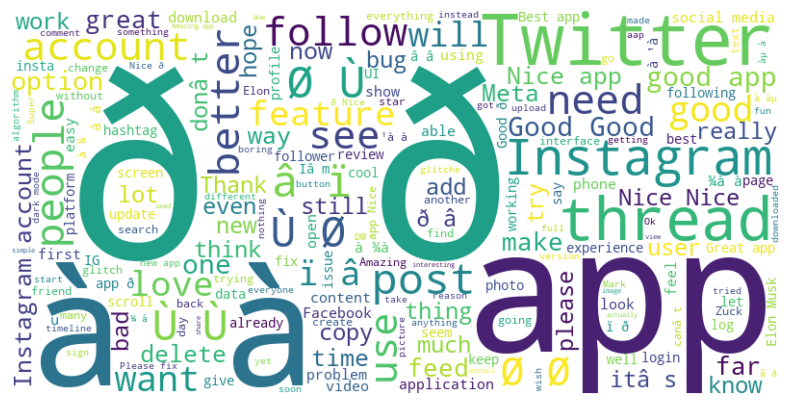

In [11]:
#Generate the wordcloud for positive and negative sentiment
text = ' '.join(tweet for tweet in df['review_description'])

wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
df.sample(50)

,source,review_description,rating,review_date,sentiment,confidence
18023,Google Play,Copy of Twitter,1,2023-07-07 10:01:27,Positive,0.532829
25725,Google Play,Super,1,2023-07-08 02:45:08,Positive,0.516531
27366,Google Play,Good,5,2023-07-11 05:46:04,Positive,0.524510
10122,Google Play,Most Out-Dated App in 20th Century,1,2023-07-06 18:55:52,Positive,0.549408
1468,Google Play,Ok in its beginning stages but - FYI crashes e...,4,2023-07-06 16:38:20,Positive,0.542805
5266,Google Play,"It was working well, but now my followers ain'...",4,2023-07-07 17:20:03,Positive,0.546456
5082,Google Play,Very dead application not working properly.â¹...,1,2023-07-10 15:59:49,Positive,0.543083
17504,Google Play,let me delete threads without affecting my ins...,1,2023-07-09 15:23:01,Positive,0.544570
16812,Google Play,Simply a copy of Twitter.,1,2023-07-09 04:46:28,Positive,0.540749
29337,Google Play,Bakwas app,1,2023-07-24 10:37:06,Positive,0.519150


In [14]:
df['sentiment'].value_counts()

sentiment
Positive    32890
Negative       20
Name: count, dtype: int64

In [16]:
df['source'].value_counts()

source
Google Play    30270
App Store       2640
Name: count, dtype: int64

In [17]:
df['rating'].value_counts()

rating
5    15559
1     9726
4     3244
3     2585
2     1796
Name: count, dtype: int64

In [15]:
#save the result to a new csv file
result = df.to_csv('sentiment_analysis_output.csv', index=False)